# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Torch 

In [2]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Compose
from torch.utils.data import DataLoader
from torch import nn
from torchsummary import summary

# Sklearn 

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

# Device 

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Helper functions 

In [5]:
def unique(dataset):
    for i in dataset:
        unique = dataset[i].unique()
        print(f'Unique: {unique}, \n ---------- \n length: {len(unique)} \n -------')

In [6]:
object = []
def object_identifer(dataset):
    for name, dtypes in dataset.dtypes.items():
        if dtypes == 'object':
            object.append(name)
    return object

In [7]:
def label_encoder(dataset, lst):
    label_encoder = LabelEncoder()
    for i in lst:
        dataset[i] = label_encoder.fit_transform(dataset[i])
    return dataset

In [8]:
null = []
def null_checker(dataset):
    for i in dataset:
        if dataset[i].isnull().sum() > 0:
            null.append(i)
    return null

In [9]:
null = []
def null_checker(dataset):
    for i in dataset:
        nuller = dataset[i].isnull().sum()
        if nuller > 0:
            print(f'{i}: {nuller}')
            null.append(i)

In [10]:
def fill_null(dataset, lst):
    for i in null:
        data[i] = data[i].fillna(method='bfill')
        data[i] = data[i].fillna(data[i].mean())
    print(data.isnull().sum())

# Data

In [11]:
data = pd.read_csv('Mobile-Phones.csv')

In [12]:
data.head()

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,Samsung,Galaxy S10,yes,"3 Cameras: 12, 12, 16 MP",1440 x 3040,AMOLED,Single,Android,White,Greater Accra,Circle,6.10,3400.0,128.0,8.0,10.0,2450.0
1,Samsung,Galaxy Note 20 Ultra,yes,"3 Cameras: 108, 12, 12 MP",1440 x 3088,AMOLED,Dual,Android,Bronze,Greater Accra,Circle,6.90,4500.0,128.0,12.0,10.0,5000.0
2,Samsung,Galaxy A54 5G,yes,"3 Cameras: 50, 12, 5 MP",1080 x 2340,Super AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.40,5000.0,256.0,8.0,32.0,3000.0
3,Tecno,Camon 20 Pro,no,"2 Cameras: 64, 2 MP",1080 x 2400,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.67,5000.0,256.0,8.0,32.0,1900.0
4,Samsung,Galaxy S22 Ultra,no,"4 Cameras: 108, 10, 10, 12 MP",1400 x 3088,AMOLED,Dual,Android,Black,Greater Accra,Accra Metropolitan,6.80,5000.0,512.0,12.0,40.0,5750.0


In [13]:
data.shape

(3600, 17)

In [14]:
data.describe()

,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
count,3473.000000,3430.000000,3597.000000,2812.000000,3293.000000,3600.000000
mean,5.904221,3788.813703,145.168752,6.143670,13.059824,3442.216667
std,0.582931,896.597135,109.056178,2.750244,9.454200,3037.076480
min,1.800000,520.000000,4.000000,1.000000,0.000000,110.000000
25%,5.800000,3110.000000,64.000000,4.000000,8.000000,1600.000000
50%,6.100000,3700.000000,128.000000,6.000000,10.000000,2600.000000
75%,6.100000,4500.000000,128.000000,8.000000,13.000000,3850.000000
max,7.600000,7000.000000,1024.000000,16.000000,40.000000,26650.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              3600 non-null   object 
 1   model              3600 non-null   object 
 2   sd_card            3600 non-null   object 
 3   main_camera        3365 non-null   object 
 4   resolution         3064 non-null   object 
 5   display            3034 non-null   object 
 6   sim_card           2810 non-null   object 
 7   os                 3381 non-null   object 
 8   color              3600 non-null   object 
 9   region             3600 non-null   object 
 10  location           3600 non-null   object 
 11  screen_size(inch)  3473 non-null   float64
 12  battery(mAh)       3430 non-null   float64
 13  storage(GB)        3597 non-null   float64
 14  ram(GB)            2812 non-null   float64
 15  selfie_camera(MP)  3293 non-null   float64
 16  price(¢)           3600 

In [16]:
data.isnull().sum()

brand                  0
model                  0
sd_card                0
main_camera          235
resolution           536
display              566
sim_card             790
os                   219
color                  0
region                 0
location               0
screen_size(inch)    127
battery(mAh)         170
storage(GB)            3
ram(GB)              788
selfie_camera(MP)    307
price(¢)               0
dtype: int64

# Calling helper function

In [17]:
unique(data)

Unique: ['Samsung' 'Tecno' 'LG' 'Vivo' 'Huawei' 'Infinix' 'Apple' 'Google' 'Oppo'
 'Nokia' 'Other Brand' 'Itel' 'Motorola' 'Realme' 'Xiaomi' 'Meizu'
 'OnePlus' 'Bontel' 'HTC' 'X-Tigi' 'Honor'], 
 ---------- 
 length: 21 
 -------
Unique: ['Galaxy S10' 'Galaxy Note 20 Ultra' 'Galaxy A54 5G' 'Camon 20 Pro'
 'Galaxy S22 Ultra' 'Galaxy A73 5G' 'Galaxy S23 Ultra'
 'Camon 20 Premier  5G' 'Spark 10 Pro' 'Galaxy A53 5G' 'V30'
 'Galaxy S21 Ultra 5G' 'Galaxy S9' 'Spark 10C' 'Y66i' 'G8X Thinq'
 'Honor 8x' 'Y9a' 'Y6 Prime' 'Galaxy S20+ 5G' 'V50 ThinQ' 'P20 Lite'
 'Galaxy Note 10 Plus' 'Galaxy Note 8' 'Galaxy S8 Plus' 'Smart 7 Plus'
 'Nova 3i' 'Galaxy A14' 'Pop 7' 'iPhone 14 Pro Max' 'iPhone 12 Pro Max'
 'Galaxy S7' 'Wing 5G' 'Spark 9T' 'Galaxy S5' 'P20' 'Galaxy A22 5G'
 'P40 Lite' 'Galaxy S8' 'Y8s' 'Galaxy S10e' 'Y9 Prime 2019' 'G6'
 'Smart 7 HD' 'Galaxy S6 edge' 'G7 ThinQ' 'Nova 2 Plus'
 'Galaxy Note 20 Ultra 5G' 'iPhone 15 Pro Max' 'Pixel 5a 5G'
 'Galaxy Note 10' 'Y5p' 'Galaxy A13' 'A15s' 'Y9 20

In [18]:
object_identifer(data)

['brand',
 'model',
 'sd_card',
 'main_camera',
 'resolution',
 'display',
 'sim_card',
 'os',
 'color',
 'region',
 'location']

In [19]:
label_encoder(data, object)

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,16,138,1,52,37,0,2,1,13,2,29,6.10,3400.0,128.0,8.0,10.0,2450.0
1,16,133,1,48,38,0,0,1,2,2,29,6.90,4500.0,128.0,12.0,10.0,5000.0
2,16,106,1,79,9,14,0,1,0,2,5,6.40,5000.0,256.0,8.0,32.0,3000.0
3,17,46,0,45,12,0,0,1,0,2,5,6.67,5000.0,256.0,8.0,32.0,1900.0
4,16,157,0,92,33,0,0,1,0,2,5,6.80,5000.0,512.0,12.0,40.0,5750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,16,132,0,119,12,0,3,1,6,2,5,NaN,4300.0,128.0,NaN,10.0,2850.0
3596,8,318,1,60,15,4,1,1,7,0,45,5.10,4000.0,64.0,8.0,13.0,1060.0
3597,14,236,0,125,68,19,3,10,0,2,29,4.00,NaN,32.0,2.0,NaN,880.0
3598,11,6,1,2,29,17,0,10,0,2,29,4.00,1020.0,4.0,NaN,NaN,299.0


In [20]:
null_checker(data)

screen_size(inch): 127
battery(mAh): 170
storage(GB): 3
ram(GB): 788
selfie_camera(MP): 307


In [21]:
data.isna().sum()

brand                  0
model                  0
sd_card                0
main_camera            0
resolution             0
display                0
sim_card               0
os                     0
color                  0
region                 0
location               0
screen_size(inch)    127
battery(mAh)         170
storage(GB)            3
ram(GB)              788
selfie_camera(MP)    307
price(¢)               0
dtype: int64

In [22]:
null

['screen_size(inch)',
 'battery(mAh)',
 'storage(GB)',
 'ram(GB)',
 'selfie_camera(MP)']

In [23]:
fill_null(data, null)

brand                0
model                0
sd_card              0
main_camera          0
resolution           0
display              0
sim_card             0
os                   0
color                0
region               0
location             0
screen_size(inch)    0
battery(mAh)         0
storage(GB)          0
ram(GB)              0
selfie_camera(MP)    0
price(¢)             0
dtype: int64


In [24]:
data

,brand,model,sd_card,main_camera,resolution,display,sim_card,os,color,region,location,screen_size(inch),battery(mAh),storage(GB),ram(GB),selfie_camera(MP),price(¢)
0,16,138,1,52,37,0,2,1,13,2,29,6.10,3400.0,128.0,8.0,10.0,2450.0
1,16,133,1,48,38,0,0,1,2,2,29,6.90,4500.0,128.0,12.0,10.0,5000.0
2,16,106,1,79,9,14,0,1,0,2,5,6.40,5000.0,256.0,8.0,32.0,3000.0
3,17,46,0,45,12,0,0,1,0,2,5,6.67,5000.0,256.0,8.0,32.0,1900.0
4,16,157,0,92,33,0,0,1,0,2,5,6.80,5000.0,512.0,12.0,40.0,5750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,16,132,0,119,12,0,3,1,6,2,5,5.10,4300.0,128.0,8.0,10.0,2850.0
3596,8,318,1,60,15,4,1,1,7,0,45,5.10,4000.0,64.0,8.0,13.0,1060.0
3597,14,236,0,125,68,19,3,10,0,2,29,4.00,1020.0,32.0,2.0,12.0,880.0
3598,11,6,1,2,29,17,0,10,0,2,29,4.00,1020.0,4.0,16.0,12.0,299.0


# Data visulization 

In [78]:
sns.lineplot??

<Axes: xlabel='price(¢)', ylabel='Count'>

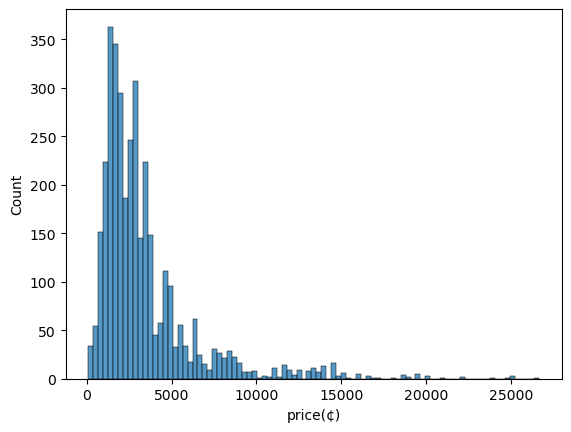

In [15]:
sns.histplot(data=data, x=data['price(¢)'])

<Axes: xlabel='display'>

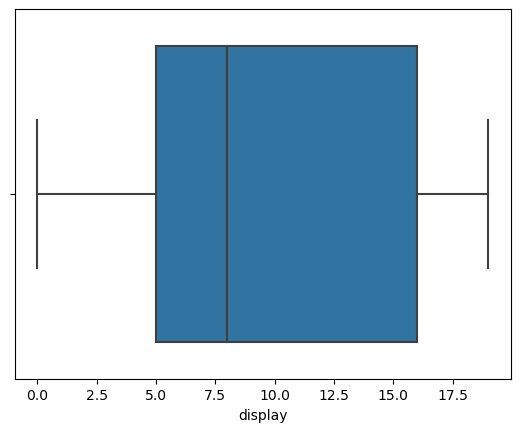

In [27]:
sns.boxplot(data=data, x=data['display'])

In [88]:
sns.violinplot??

<Axes: xlabel='screen_size(inch)'>

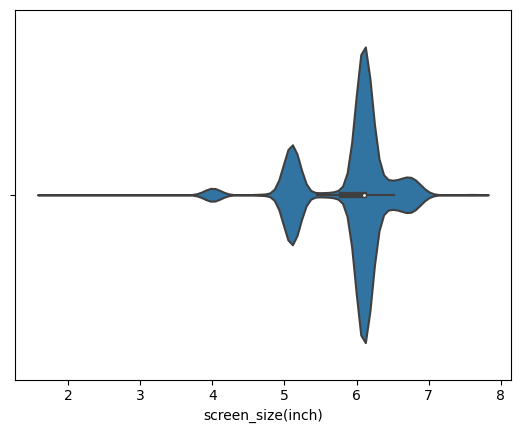

In [17]:
sns.violinplot(data=data, x=data['screen_size(inch)'])

<Axes: xlabel='price(¢)', ylabel='brand'>

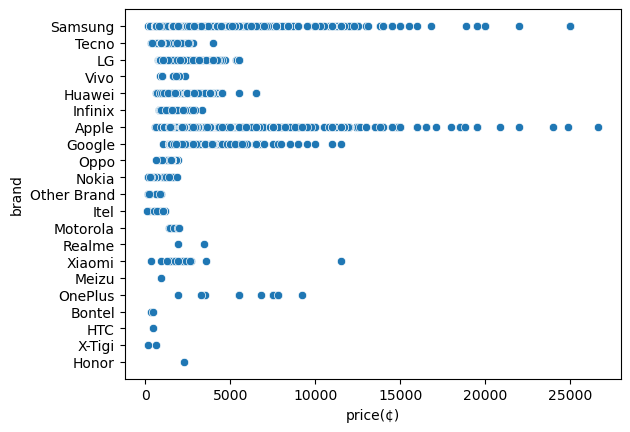

In [18]:
sns.scatterplot(data=data, x=data['price(¢)'], y=data['brand'])

In [30]:
sns.PairGrid??

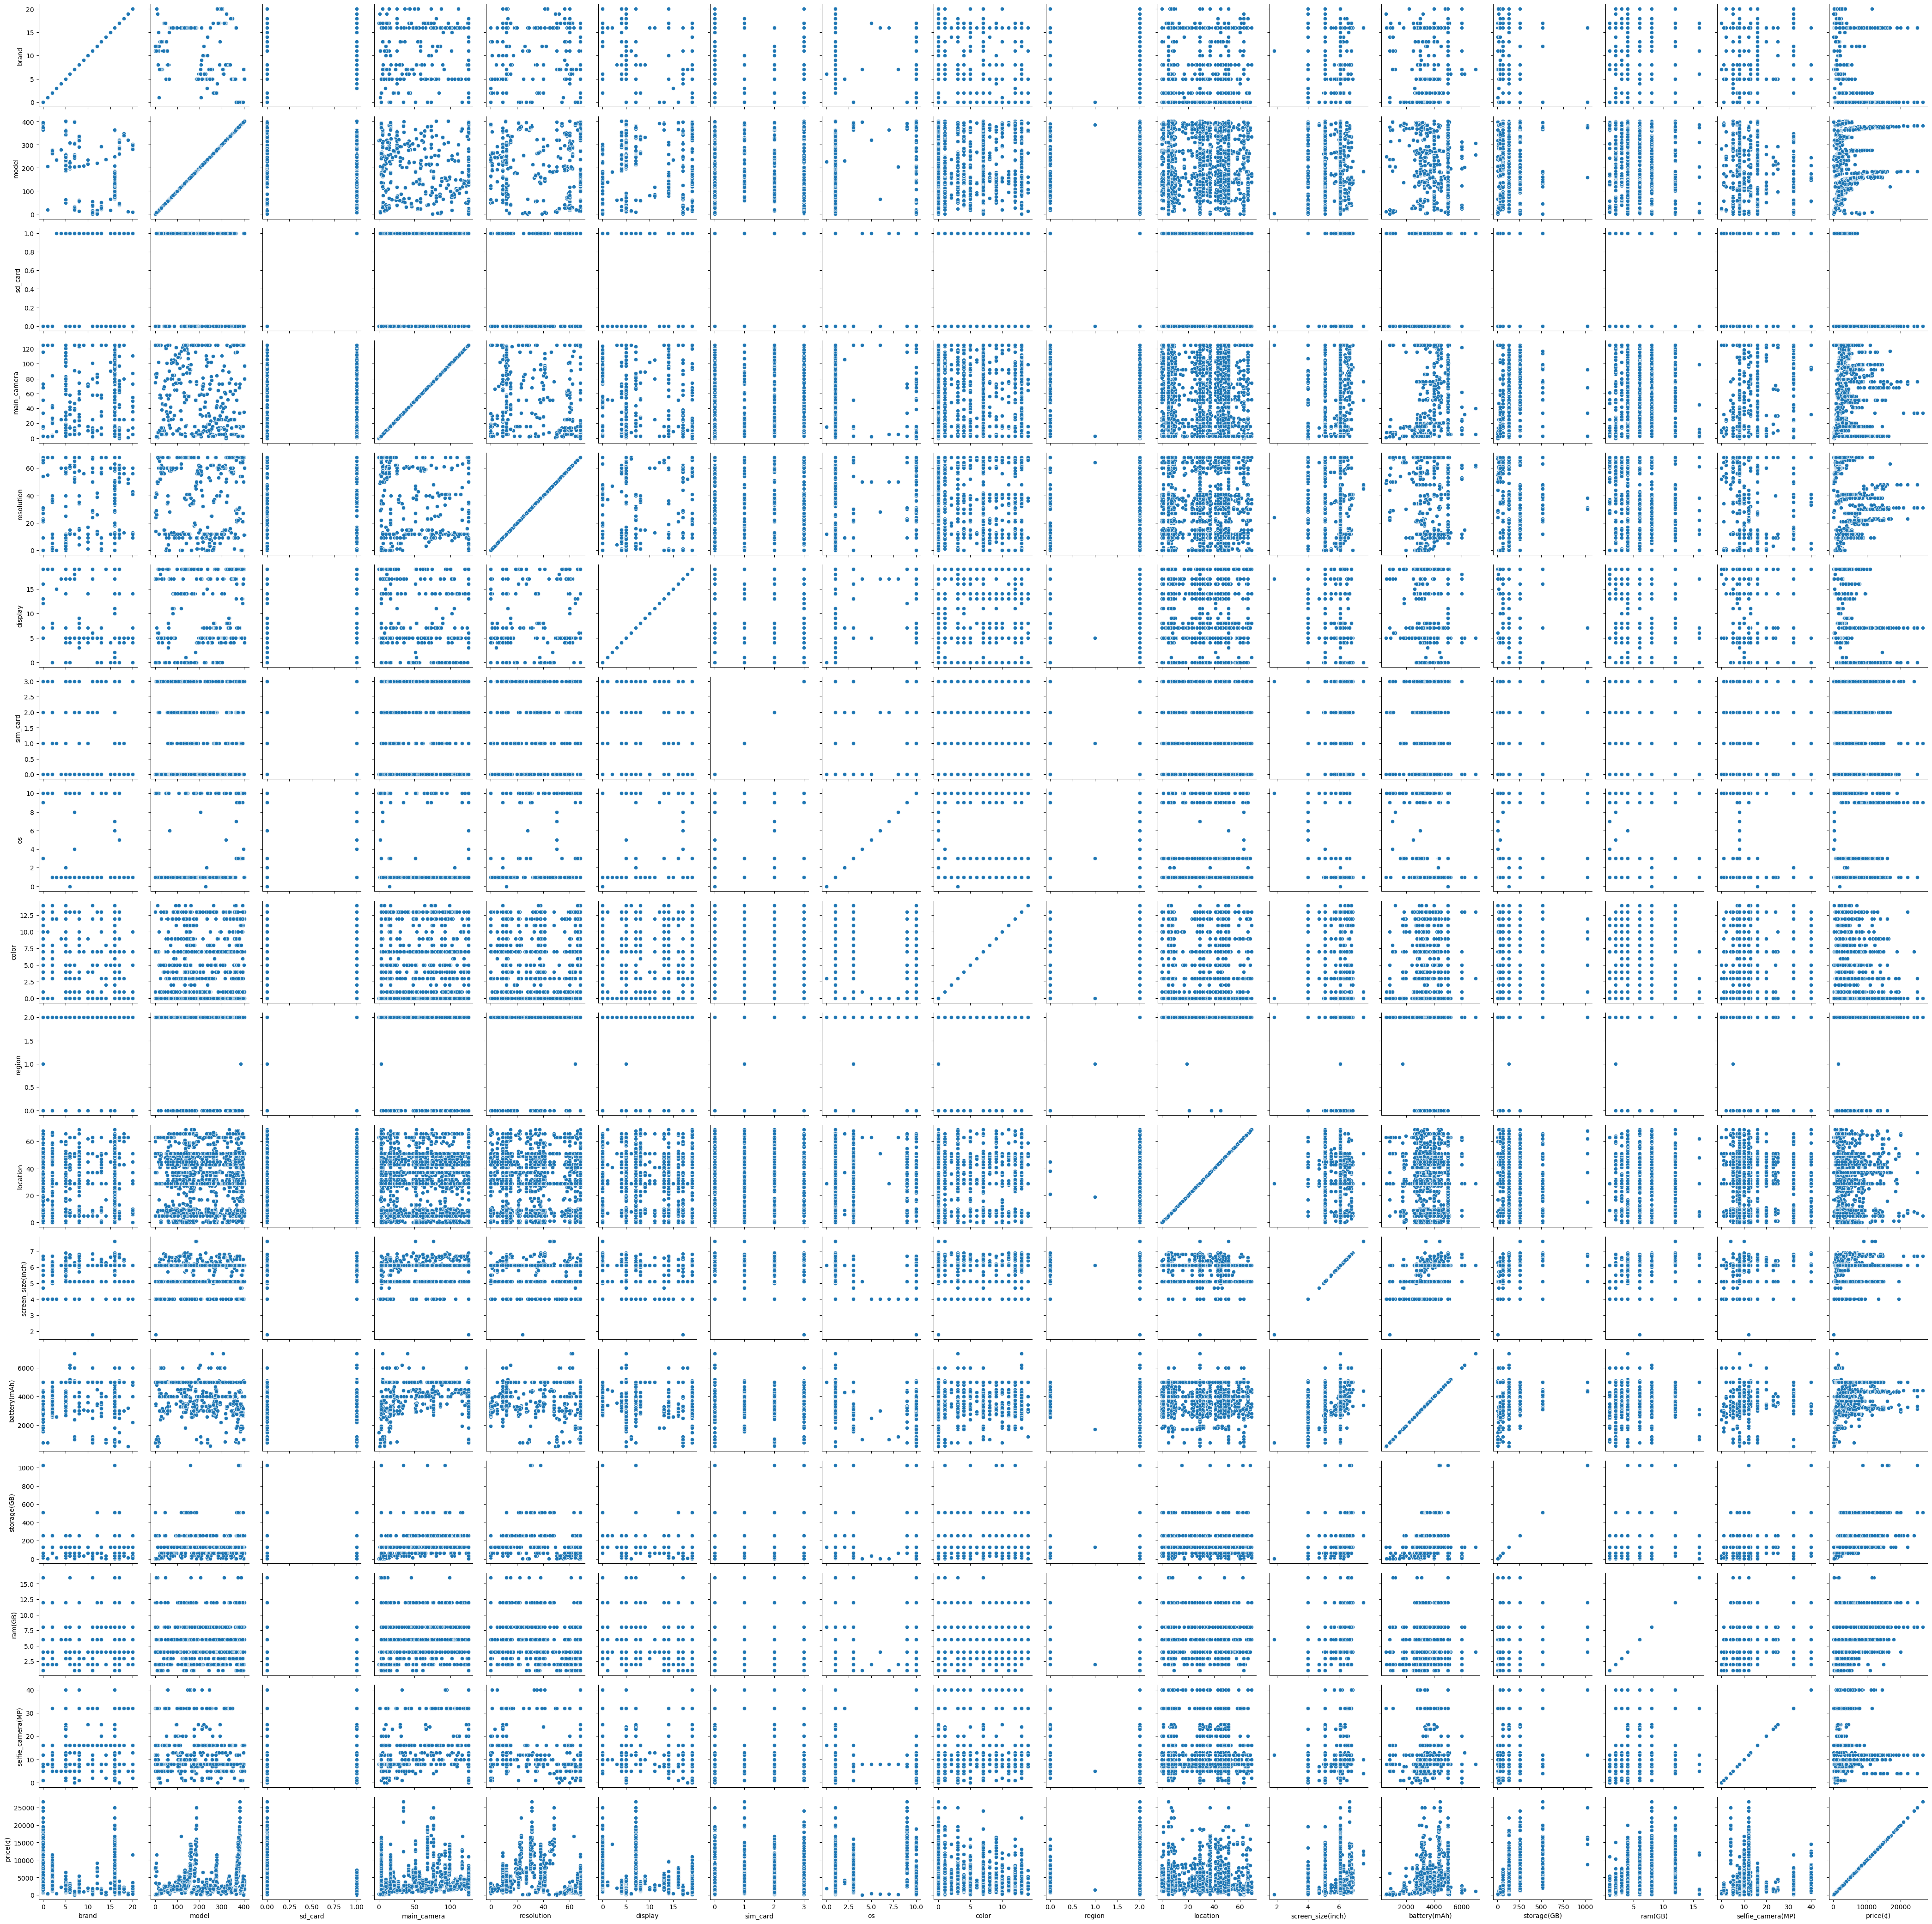

In [33]:
sample = sns.PairGrid(data)
sample.map(sns.scatterplot)

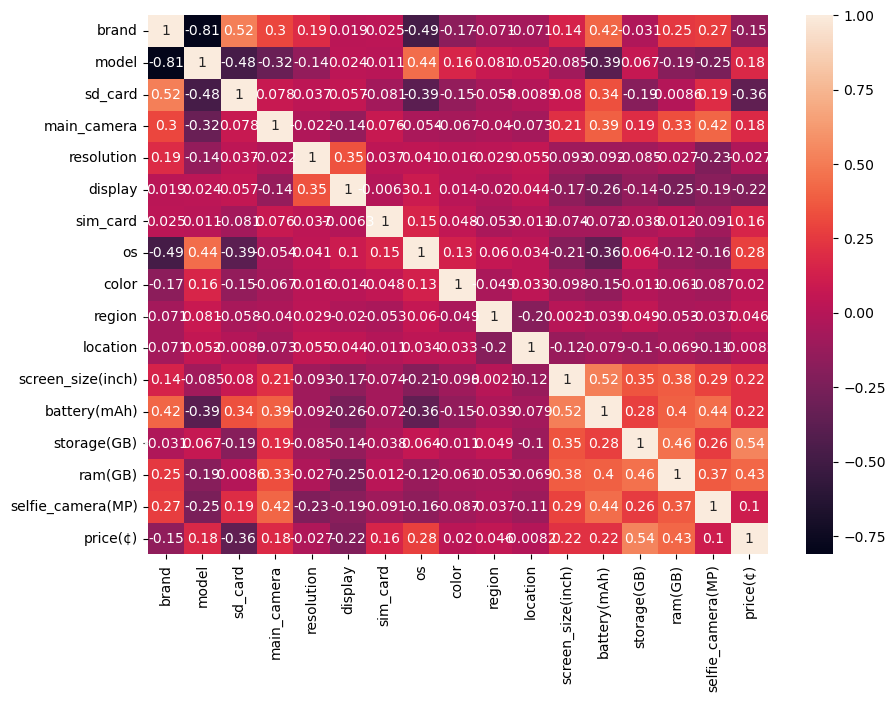

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

<Axes: xlabel='price(¢)', ylabel='selfie_camera(MP)'>

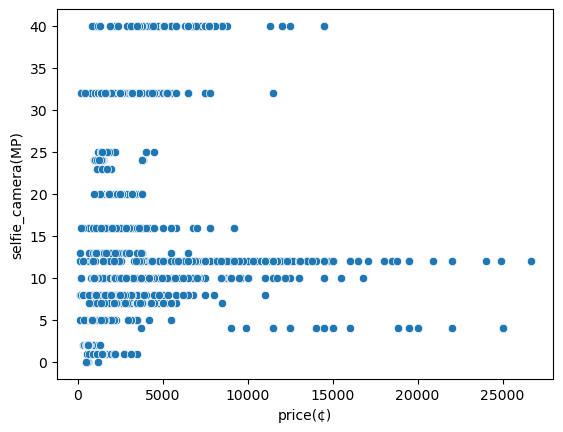

In [44]:
sns.scatterplot(data, x=data['price(¢)'], y=data['selfie_camera(MP)'])

Text(0, 0.5, 'Count')

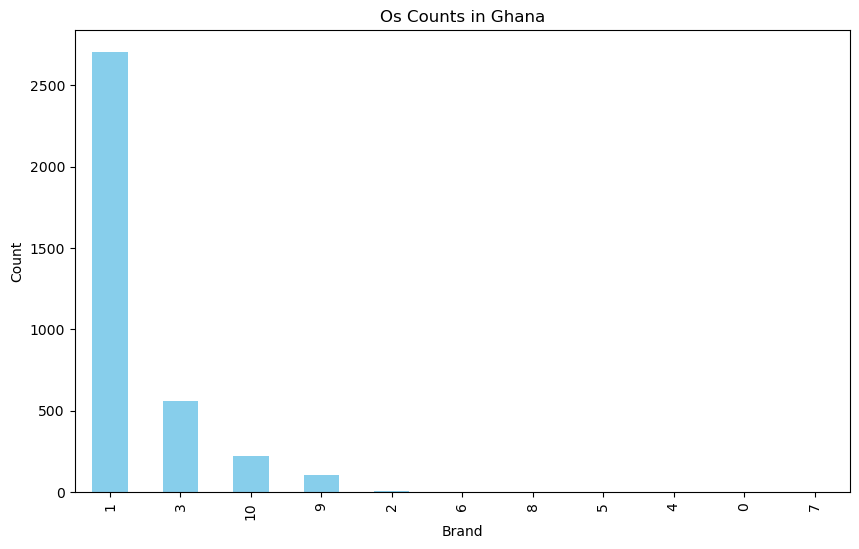

In [49]:
os_counts = data['os'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
os_counts.plot(kind='bar', color='skyblue')
plt.title('Os Counts in Ghana')
plt.xlabel('Brand')
plt.ylabel('Count')

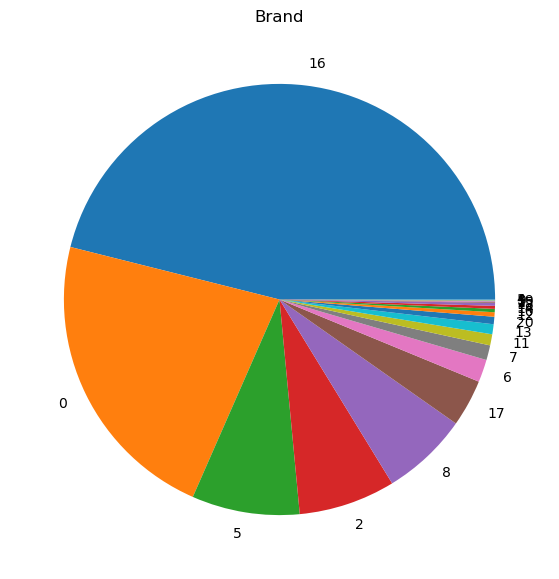

In [54]:
values = data['brand'].value_counts()

plt.figure(figsize=(10,7))
plt.pie(values, labels=values.index)
plt.title('Brand')
plt.show()

# Train test spliting 

In [25]:
x = data.drop(['price(¢)'], axis=1)
y = data['price(¢)']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

# Random Forest model 

In [27]:
model = RandomForestRegressor()

In [28]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [29]:
model.score(x_test, y_test)

0.9188980479012177

# PyTorch 

In [30]:
type(x_train), type(x_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [31]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [32]:
type(x_train), type(x_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [33]:
x_train = torch.from_numpy(x_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
x_test = torch.from_numpy(x_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [34]:
type(x_train), type(x_test), type(y_train), type(y_test)

(torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor)

#  Dataloader

In [35]:
train_loader = DataLoader(list(zip(x_train, y_train)), batch_size=32, shuffle=True)
test_loader = DataLoader(list(zip(x_test, y_test)), batch_size=32)

In [36]:
train_loader

# Accuracy 

In [37]:
def accuracy_score(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

# Model building 

In [38]:
class Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=16, out_features=32)
        self.layer_2 = nn.Linear(in_features=32, out_features=32)
        self.layer_3 = nn.Linear(in_features=32, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    

In [39]:
model = Regression().to(device)
model

Regression(
  (layer_1): Linear(in_features=16, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

In [42]:
summary(model,(16,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]             544
              ReLU-2                   [-1, 32]               0
            Linear-3                   [-1, 32]           1,056
              ReLU-4                   [-1, 32]               0
            Linear-5                    [-1, 1]              33
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


# Loss and optimizers 

In [43]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [44]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [45]:
loss_fn

MSELoss()

In [46]:
model.train()
for batch_x, batch_y in train_loader:
    batch_x = batch_x.to(device)  # Move the data to the device
    batch_y = batch_y.to(device)
    optimizer.zero_grad()
    sample = model(batch_x)
    
import torch

# Assuming y_pred is your prediction tensor
# Check if any element in y_pred is NaN
if torch.isnan(sample).any():
    print("y_pred contains NaN values")
else:
    print("y_pred does not contain NaN values")


y_pred does not contain NaN values


In [47]:
import torch
from sklearn.metrics import accuracy_score

# Define your model, loss function, and optimizer here
# model = Regression()
# loss_fn = nn.MSELoss()  # Example loss function (update it as needed)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Example optimizer (update it as needed)

epochs = 500
train_loss, train_acc = 0, 0

for epoch in range(epochs):
    model.train()
    model.to(device)
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)  # Move the data to the device
        batch_y = batch_y.to(device)
        
        optimizer.zero_grad()

        # 1. Forward pass
        y_pred = model(batch_x)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, batch_y)

        # 3. Optimizer zero grad
        

        # 4. Loss backward and optimizer step
        loss.backward()
        optimizer.step()

        # Accumulate the loss and accuracy
        

    # Calculate the average loss and accuracy for this epoch
    train_loss /= len(train_loader)
    train_acc /= len(train_loader)

    print(f"Epoch: {epoch+1}/{epochs}, Train Loss: {train_loss:.5f}, Train Accuracy: {train_acc * 100:.2f}%")

    model.eval()
    test_predictions = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)

            # 1. Forward pass
            test_pred = model(batch_x)

            # Calculate the predictions and extend the list
            predictions = torch.round(torch.sigmoid(test_pred))
            test_predictions.extend(predictions.tolist())

    accuracy = accuracy_score(y_test.tolist(), test_predictions)

    print(f"Epoch: {epoch+1}/{epochs}, Test Accuracy: {accuracy * 100:.2f}%")


E:\Anaconda\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1/500, Train Loss: 0.00000, Train Accuracy: 0.00%


E:\Anaconda\Lib\site-packages\sklearn\utils\multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y_pred contains NaN.